1. Write a program to perform 4 arithmetic operations between 2 images.  
2. Take a noisy image. Write a program which reduces the noise by averaging the input image by 2, 8, 16, 32, 128. Compare all the resultant images and find which one is noise-free.  
3. Write a program which implements all the types of linear spatial filters using functions.  
4. Implement a program for image convolution and correlation using a rectangular convolution mask of any odd size. The mask should be input as an ASCII text file. Test your program using the following convolutional kernels:  
   a. 3×3 averaging  
   b. 7×7 averaging  
   c. 11×11 averaging  


In [9]:
%pip install opencv-python numpy

In [7]:
import cv2
import numpy as np

--2025-09-26 09:19:18--  https://i.ytimg.com/vi/vEYsdh6uiS4/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.251.2.119, 142.250.141.119, 74.125.137.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.251.2.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32228 (31K) [image/jpeg]
Saving to: ‘image1.png’

image1.png          100%[===================>]  31.47K  --.-KB/s    in 0s      

2025-09-26 09:19:18 (107 MB/s) - ‘image1.png’ saved [32228/32228]



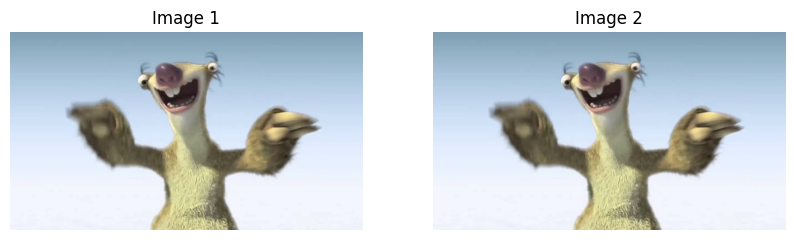

In [10]:
!wget -O image1.png https://i.ytimg.com/vi/vEYsdh6uiS4/maxresdefault.jpg
import shutil
shutil.copy('image1.png', 'image2.png')
img1 = cv2.imread('image1.png')
img2 = cv2.imread('image2.png')

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')
plt.show()

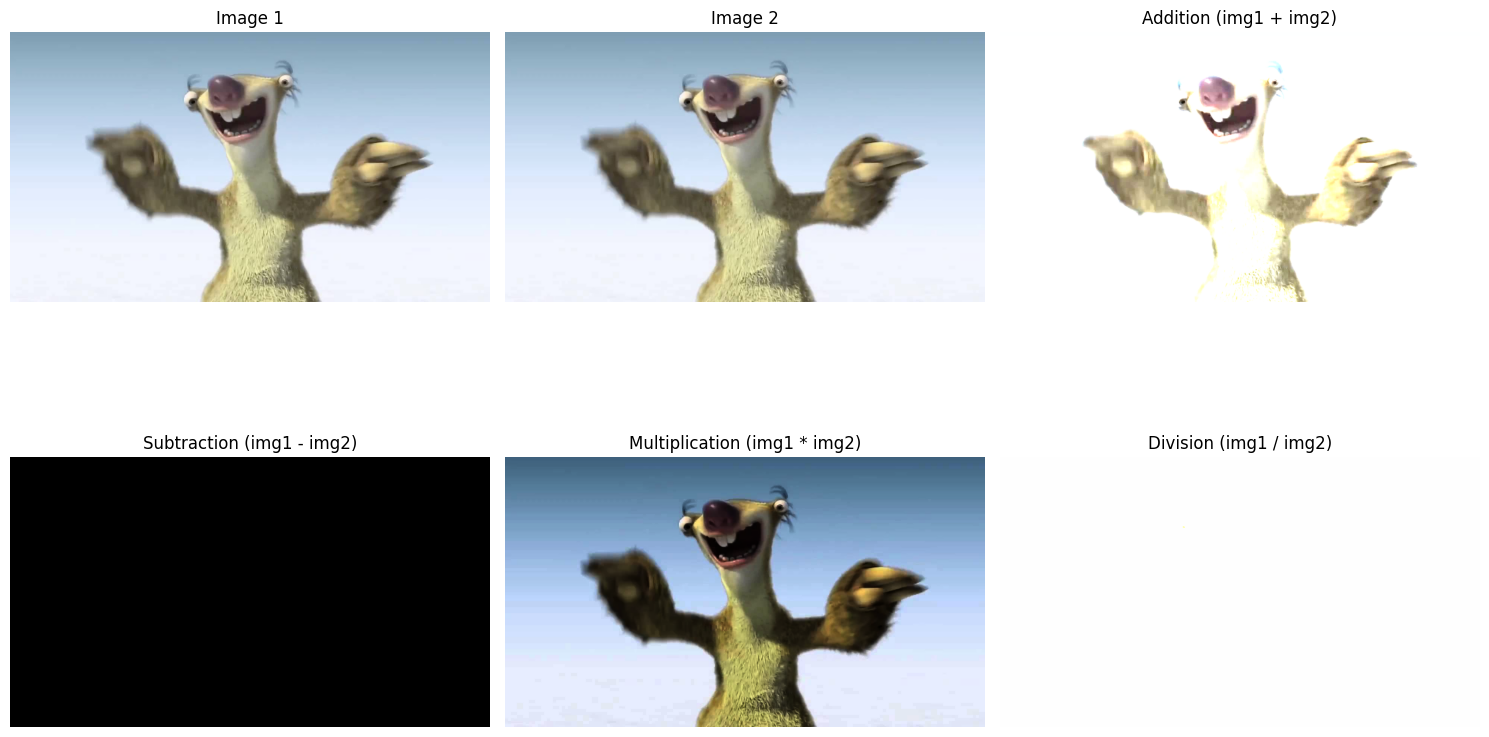

In [ ]:
# 1. addition
img_add = cv2.add(img1, img2)

# 2. subtraction
img_sub = cv2.subtract(img1, img2)

# 3. multiplication
img1_float = img1.astype(np.float32) / 255.0
img2_float = img2.astype(np.float32) / 255.0
img_mul_float = cv2.multiply(img1_float, img2_float)
img_mul = (img_mul_float * 255.0).astype(np.uint8)

# 4. division
img_div_float = cv2.divide(img1_float, img2_float + 1e-5)
img_div = (img_div_float * 255.0).astype(np.uint8)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB))
plt.title('Addition (img1 + img2)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img_sub, cv2.COLOR_BGR2RGB))
plt.title('Subtraction (img1 - img2)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img_mul, cv2.COLOR_BGR2RGB))
plt.title('Multiplication (img1 * img2)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(img_div, cv2.COLOR_BGR2RGB))
plt.title('Division (img1 / img2)')
plt.axis('off')

plt.tight_layout()
plt.show()

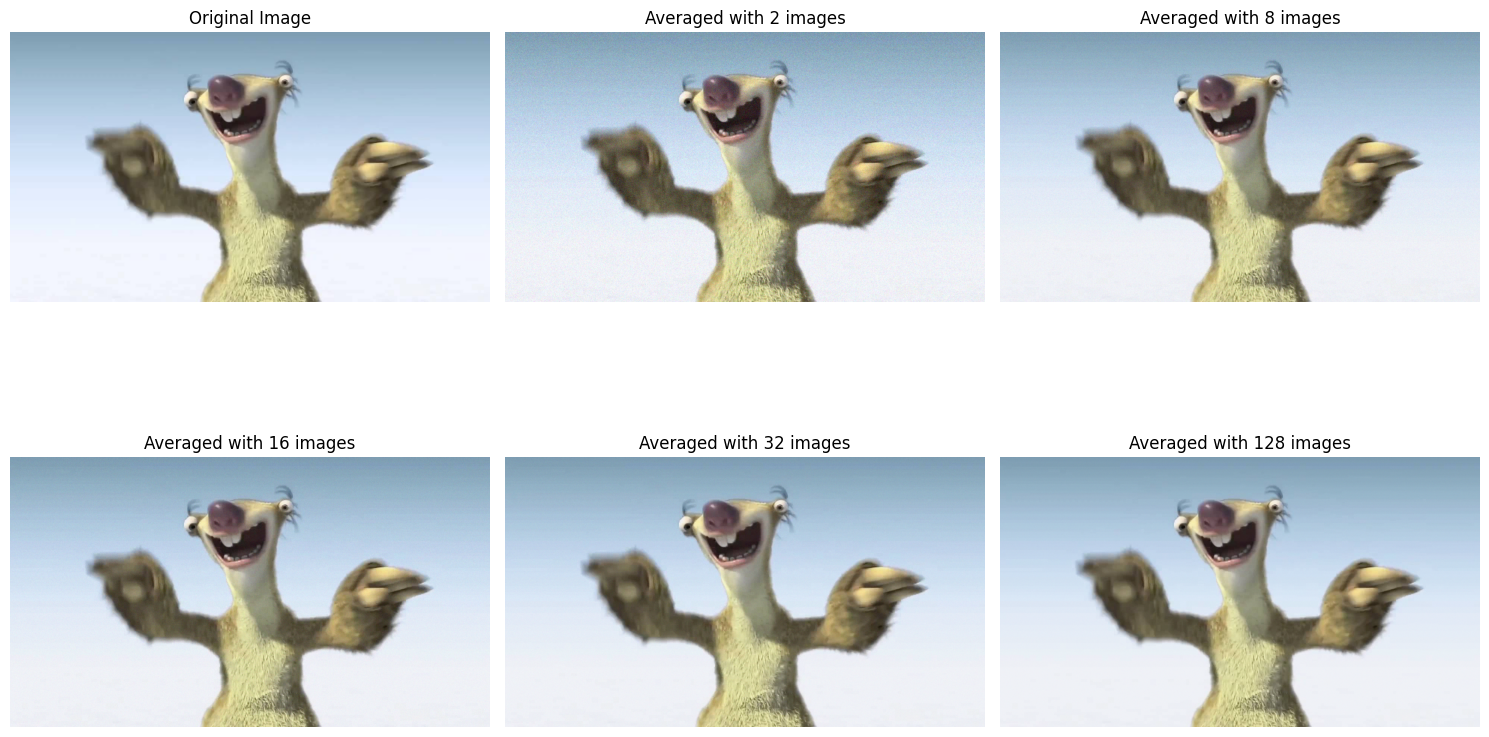

In [ ]:
def reduce_noise_by_averaging(image, num_averages):

    if num_averages <= 0:
        return image

    averaged_image = np.zeros_like(image, dtype=np.float64)

    for _ in range(num_averages):
        noise = np.random.normal(0, 20, image.shape).astype(np.int16)
        noisy_image = cv2.add(image.astype(np.int16), noise, dtype=cv2.CV_16S)
        noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

        averaged_image += noisy_image.astype(np.float64)

    averaged_image /= num_averages

    return np.clip(averaged_image, 0, 255).astype(np.uint8)

num_averages_list = [2, 8, 16, 32, 128]
averaged_images = {}

for num_avg in num_averages_list:
    averaged_images[num_avg] = reduce_noise_by_averaging(img1, num_avg)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

for i, num_avg in enumerate(num_averages_list):
    plt.subplot(2, 3, i + 2)
    plt.imshow(cv2.cvtColor(averaged_images[num_avg], cv2.COLOR_BGR2RGB))
    plt.title(f'Averaged with {num_avg} images')
    plt.axis('off')

plt.tight_layout()
plt.show()

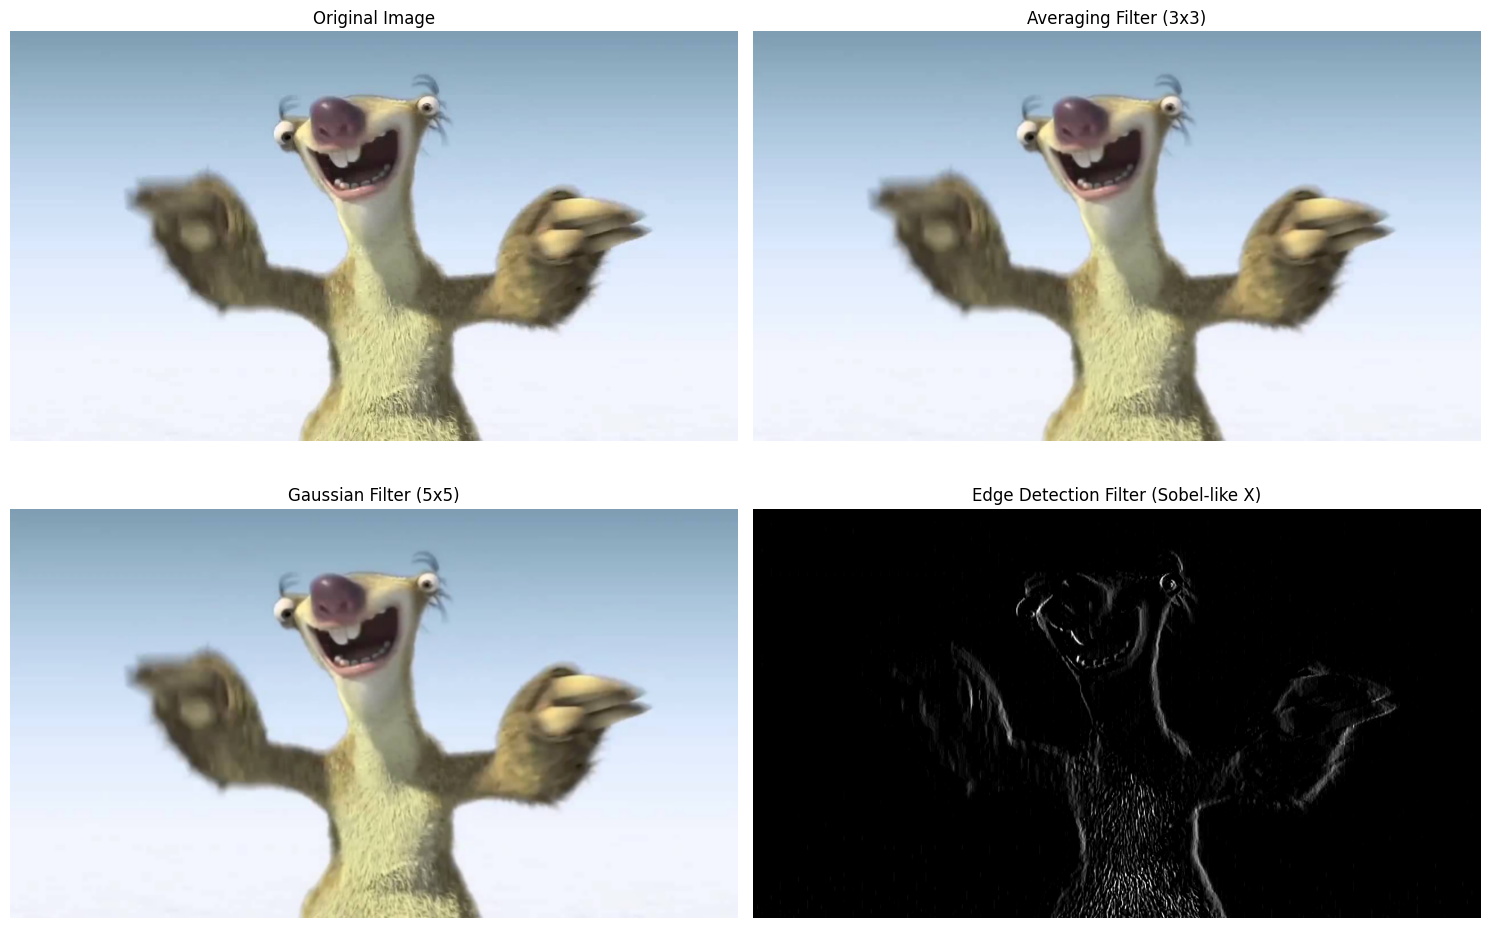

In [ ]:
def apply_convolution(image, kernel):

    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel dimensions must be odd")

    img_height, img_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REPLICATE)

    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(img_height):
        for j in range(img_width):
            # extract the region of interest (ROI) from the padded image
            roi = padded_image[i:i + kernel_height, j:j + kernel_width]

            if len(image.shape) == 3:
                for c in range(image.shape[2]):
                    output_image[i, j, c] = np.sum(roi[:, :, c] * kernel)
            else:
                 output_image[i, j] = np.sum(roi * kernel)

    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image


# 1. averaging filter (3x3)
average_kernel_3x3 = np.ones((3, 3), np.float32) / 9

# 2. gaussian filter (5x5 - approximation)
gaussian_kernel_5x5 = np.array([[1, 4, 7, 4, 1],
                                [4, 16, 26, 16, 4],
                                [7, 26, 41, 26, 7],
                                [4, 16, 26, 16, 4],
                                [1, 4, 7, 4, 1]], dtype=np.float32) / 273

# 3. edge detection filter (Sobel-like in x direction)
edge_detection_kernel_x = np.array([[-1, 0, 1],
                                   [-2, 0, 2],
                                   [-1, 0, 1]], dtype=np.float32)

img_averaged = apply_convolution(img1, average_kernel_3x3)
img_gaussian = apply_convolution(img1, gaussian_kernel_5x5)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_edge_x = apply_convolution(img1_gray, edge_detection_kernel_x)


plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_averaged, cv2.COLOR_BGR2RGB))
plt.title('Averaging Filter (3x3)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filter (5x5)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_edge_x, cmap='gray')
plt.title('Edge Detection Filter (Sobel-like X)')
plt.axis('off')

plt.tight_layout()
plt.show()

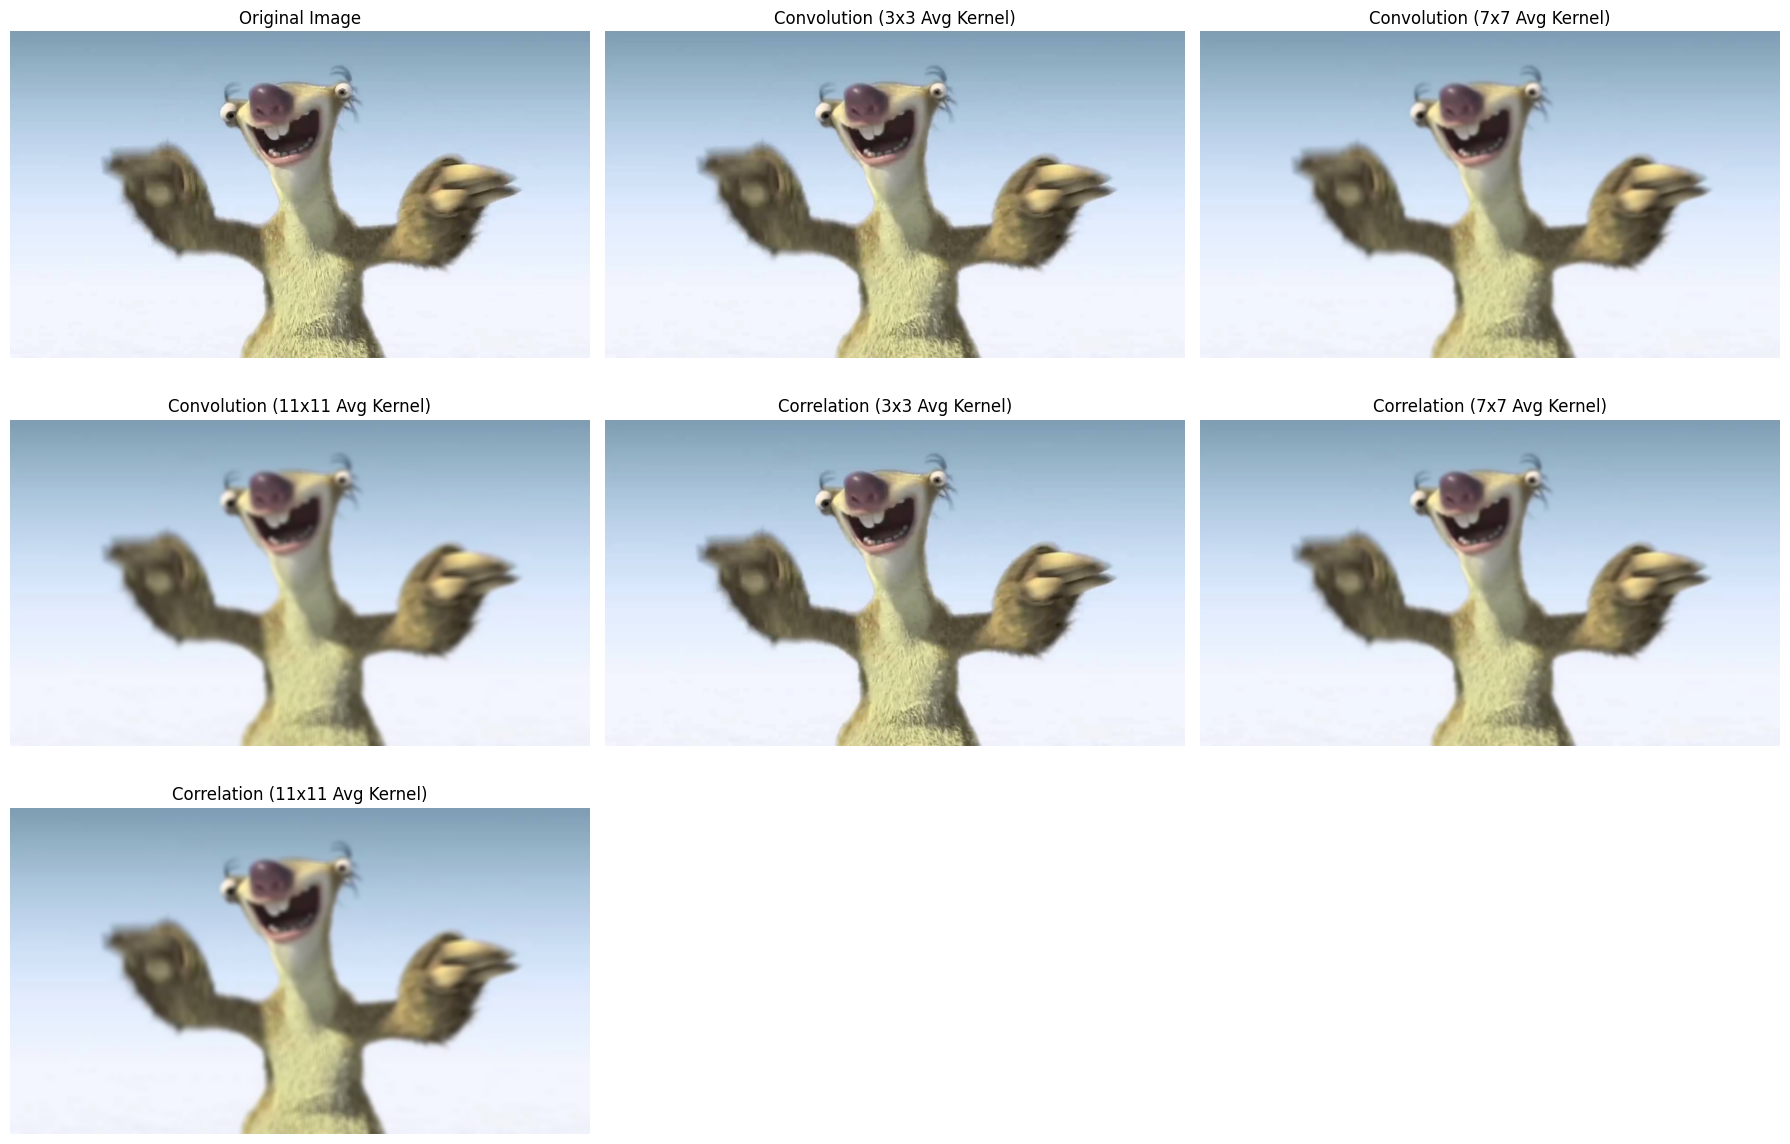

In [ ]:
def load_kernel_from_text(file_path):

    with open(file_path, 'r') as f:
        lines = f.readlines()
    kernel_list = []
    for line in lines:
        row = [float(x) for x in line.replace(',', ' ').split()]
        kernel_list.append(row)
    return np.array(kernel_list, dtype=np.float32)

def apply_correlation(image, kernel):

    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel dimensions must be odd")

    img_height, img_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REPLICATE)

    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(img_height):
        for j in range(img_width):
            roi = padded_image[i:i + kernel_height, j:j + kernel_width]

            if len(image.shape) == 3:
                for c in range(image.shape[2]):
                    output_image[i, j, c] = np.sum(roi[:, :, c] * kernel)
            else:
                 output_image[i, j] = np.sum(roi * kernel)

    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image

# 3x3 averaging kernel
with open('average_kernel_3x3.txt', 'w') as f:
    val = 1/9.0
    f.write(f'{val} {val} {val}\n')
    f.write(f'{val} {val} {val}\n')
    f.write(f'{val} {val} {val}\n')

# 7x7 averaging kernel
with open('average_kernel_7x7.txt', 'w') as f:
    val = 1/49.0
    for _ in range(7):
        f.write((' '.join([str(val)] * 7)) + '\n')

# 11x11 averaging kernel
with open('average_kernel_11x11.txt', 'w') as f:
    val = 1/121.0
    for _ in range(11):
        f.write((' '.join([str(val)] * 11)) + '\n')

kernel_3x3 = load_kernel_from_text('average_kernel_3x3.txt')
kernel_7x7 = load_kernel_from_text('average_kernel_7x7.txt')
kernel_11x11 = load_kernel_from_text('average_kernel_11x11.txt')

img_conv_3x3 = apply_convolution(img1, kernel_3x3)
img_conv_7x7 = apply_convolution(img1, kernel_7x7)
img_conv_11x11 = apply_convolution(img1, kernel_11x11)

img_corr_3x3 = apply_correlation(img1, kernel_3x3)
img_corr_7x7 = apply_correlation(img1, kernel_7x7)
img_corr_11x11 = apply_correlation(img1, kernel_11x11)

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(img_conv_3x3, cv2.COLOR_BGR2RGB))
plt.title('Convolution (3x3 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(img_conv_7x7, cv2.COLOR_BGR2RGB))
plt.title('Convolution (7x7 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(img_conv_11x11, cv2.COLOR_BGR2RGB))
plt.title('Convolution (11x11 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(img_corr_3x3, cv2.COLOR_BGR2RGB))
plt.title('Correlation (3x3 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(img_corr_7x7, cv2.COLOR_BGR2RGB))
plt.title('Correlation (7x7 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(img_corr_11x11, cv2.COLOR_BGR2RGB))
plt.title('Correlation (11x11 Avg Kernel)')
plt.axis('off')


plt.tight_layout()
plt.show()

5. Write a prgoram for implementing median filtering of an img. Add salt and pepper noise to it. Apply the median filter to the noisy img and compare the results.
6. Detect the edges in an ing using the following methods and compare the relative performance of these methods:  
    a. sobel  
    b. prewitt  
    c. roberts  
    d. lapacian of a gaussian (LoG)   
    e. canny

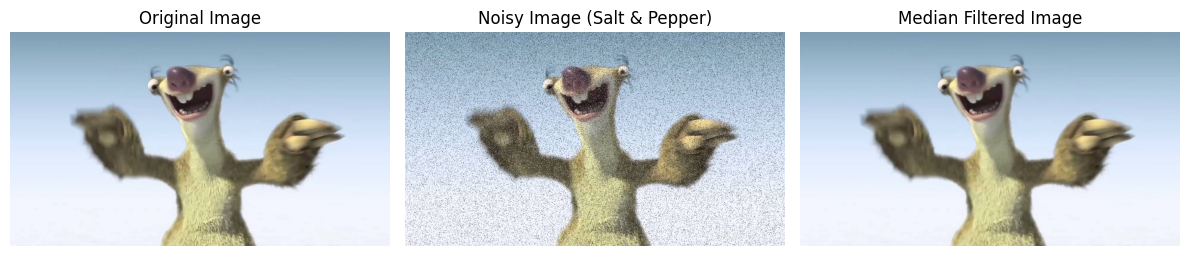

In [ ]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):

    noisy_image = np.copy(image)
    total_pixels = image.size

    # add salt noise
    num_salt = np.ceil(salt_prob * total_pixels).astype(int)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    if len(image.shape) == 2: # grayscale
        noisy_image[coords[0], coords[1]] = 255
    else: # color
        noisy_image[coords[0], coords[1], :] = 255

    # add pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels).astype(int)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    if len(image.shape) == 2: # grayscale
        noisy_image[coords[0], coords[1]] = 0
    else: # color
        noisy_image[coords[0], coords[1], :] = 0

    return noisy_image

def apply_median_filter(image, kernel_size):

    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd")

    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

# add salt and pepper noise
noisy_img = add_salt_and_pepper_noise(img1, 0.02, 0.02)

# apply median filter
median_filtered_img = apply_median_filter(noisy_img, 5) # Using a 5x5 kernel

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(median_filtered_img, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [20]:
img = cv2.imread('image1.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
def sobel_edge_detection(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    return cv2.convertScaleAbs(sobel_combined)

def prewitt_edge_detection(image):
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    prewittx = cv2.filter2D(image, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(image, cv2.CV_64F, kernely)
    prewitt_combined = cv2.magnitude(prewittx, prewitty)
    return cv2.convertScaleAbs(prewitt_combined)

def roberts_edge_detection(image):
    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    robertsx = cv2.filter2D(image, cv2.CV_64F, kernelx)
    robertsy = cv2.filter2D(image, cv2.CV_64F, kernely)
    roberts_combined = cv2.magnitude(robertsx, robertsy)
    return cv2.convertScaleAbs(roberts_combined)

def log_edge_detection(image, kernel_size=5, sigma=1.0):
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    log_img = cv2.Laplacian(blurred, cv2.CV_64F)
    return cv2.convertScaleAbs(log_img)

def canny_edge_detection(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

sobel_img = sobel_edge_detection(gray_img)
prewitt_img = prewitt_edge_detection(gray_img)
roberts_img = roberts_edge_detection(gray_img)
log_img = log_edge_detection(gray_img)
canny_img = canny_edge_detection(gray_img, 100, 200)

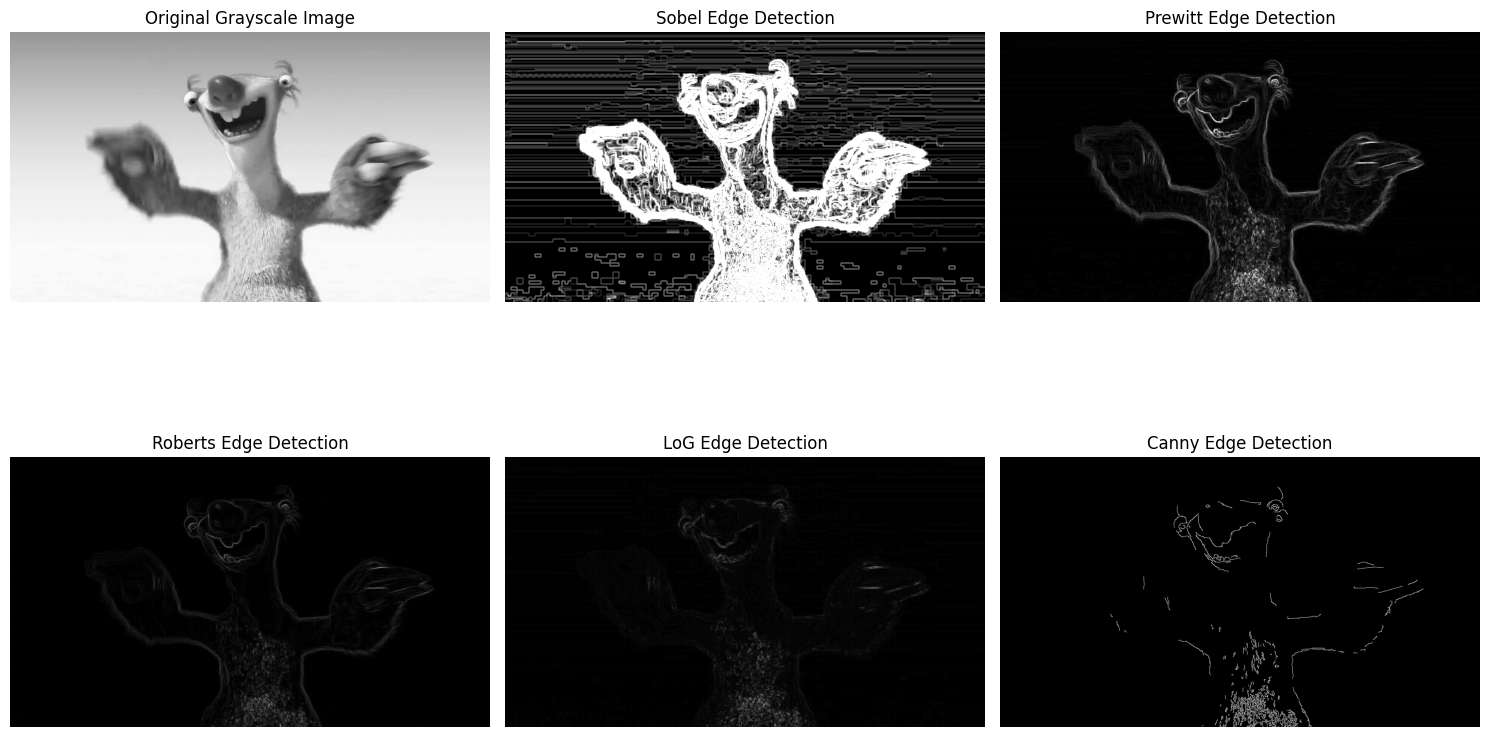

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sobel_img, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(prewitt_img, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(roberts_img, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(log_img, cmap='gray')
plt.title('LoG Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(canny_img, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

7. Write a program for smoothening an rgb color img with a linear spatial filter.
8. Write a programf or sharpening an rgb color img with the laplacian filter mask.
9. Take a sample image of size 256*256. Write a program for implementing DFT filtering  
    a. with padding  
    b. without padding  
and compare the results.
10. Write a program to implement various low pass or smoothening frequency domain filters.
11. Write a program to implement various high pass or sharpening frequency domain filters.
12. Write a program to detect straight lines using horizontal, vertical, and diagonal filter masks.

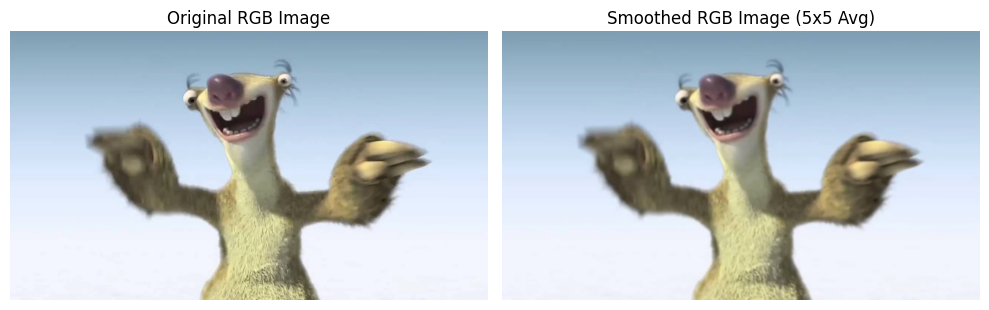

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_linear_filter_rgb(image, kernel):
    # Apply the filter to each color channel
    filtered_image = np.zeros_like(image, dtype=np.float32)
    for c in range(image.shape[2]):
        filtered_image[:, :, c] = cv2.filter2D(image[:, :, c], cv2.CV_32F, kernel)

    return np.clip(filtered_image, 0, 255).astype(np.uint8)

# Create a 5x5 averaging kernel
kernel_size = 5
averaging_kernel_rgb = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

# Apply the filter to the original color image (img1)
img_smoothed_rgb = apply_linear_filter_rgb(img1, averaging_kernel_rgb)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_smoothed_rgb, cv2.COLOR_BGR2RGB))
plt.title(f'Smoothed RGB Image ({kernel_size}x{kernel_size} Avg)')
plt.axis('off')

plt.tight_layout()
plt.show()

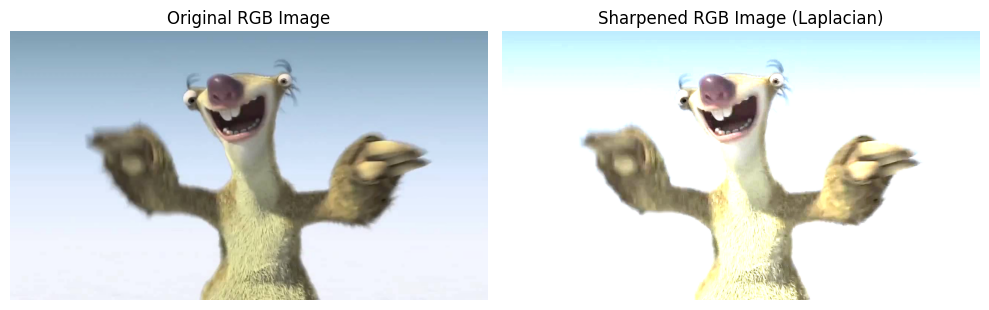

In [15]:
def apply_laplacian_sharpening_rgb(image):
    # Define a Laplacian kernel
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]], dtype=np.float32)

    # Apply the filter to each color channel
    sharpened_image = np.zeros_like(image, dtype=np.float32)
    for c in range(image.shape[2]):
        sharpened_image[:, :, c] = cv2.filter2D(image[:, :, c], cv2.CV_32F, laplacian_kernel)

    # Add the sharpened result back to the original image to enhance edges
    # We need to be careful with clipping values
    sharpened_image = cv2.addWeighted(image.astype(np.float32), 1.5, sharpened_image, -0.5, 0)

    return np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Apply Laplacian sharpening to the original color image (img1)
img_sharpened_rgb = apply_laplacian_sharpening_rgb(img1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_sharpened_rgb, cv2.COLOR_BGR2RGB))
plt.title('Sharpened RGB Image (Laplacian)')
plt.axis('off')

plt.tight_layout()
plt.show()

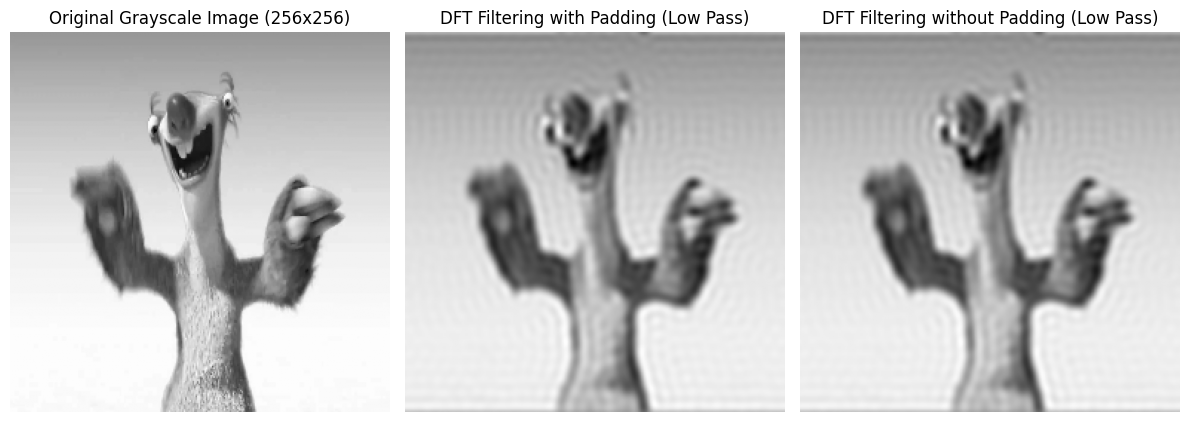

In [21]:
def apply_dft_filter(image, filter_mask, use_padding=True):
    rows, cols = image.shape
    if use_padding:
        nrows = cv2.getOptimalDFTSize(rows)
        ncols = cv2.getOptimalDFTSize(cols)
        padded_image = cv2.copyMakeBorder(image, 0, nrows - rows, 0, ncols - cols, cv2.BORDER_CONSTANT, value=0)
    else:
        padded_image = image.copy()

    dft = cv2.dft(np.float32(padded_image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center
    dft_shift = np.fft.fftshift(dft)

    # Apply the filter mask
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
    filtered_dft_shift = dft_shift * filter_mask[:, :, np.newaxis]

    # Inverse shift
    f_ishift = np.fft.ifftshift(filtered_dft_shift)

    # Inverse DFT
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Crop to original size if padding was used
    if use_padding:
        img_back = img_back[0:rows, 0:cols]

    return cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Create a grayscale version of the image and resize to 256x256
img_gray_resized = cv2.resize(gray_img, (256, 256))
rows, cols = img_gray_resized.shape

# Create a simple low-pass filter mask (Butterworth filter approximation)
dft_rows, dft_cols = (cv2.getOptimalDFTSize(rows), cv2.getOptimalDFTSize(cols)) if True else (rows, cols)
center_row, center_col = dft_rows // 2, dft_cols // 2
mask = np.zeros((dft_rows, dft_cols), np.uint8)
D0 = 30 # Cutoff frequency
for i in range(dft_rows):
    for j in range(dft_cols):
        D = np.sqrt((i - center_row)**2 + (j - center_col)**2)
        mask[i, j] = 255 if D < D0 else 0 # Simple ideal low-pass filter

# Apply DFT filtering with and without padding
img_dft_padded = apply_dft_filter(img_gray_resized, mask, use_padding=True)
img_dft_without_padded = apply_dft_filter(img_gray_resized, mask[0:rows, 0:cols], use_padding=False)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_gray_resized, cmap='gray')
plt.title('Original Grayscale Image (256x256)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_dft_padded, cmap='gray')
plt.title('DFT Filtering with Padding (Low Pass)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_dft_without_padded, cmap='gray')
plt.title('DFT Filtering without Padding (Low Pass)')
plt.axis('off')

plt.tight_layout()
plt.show()

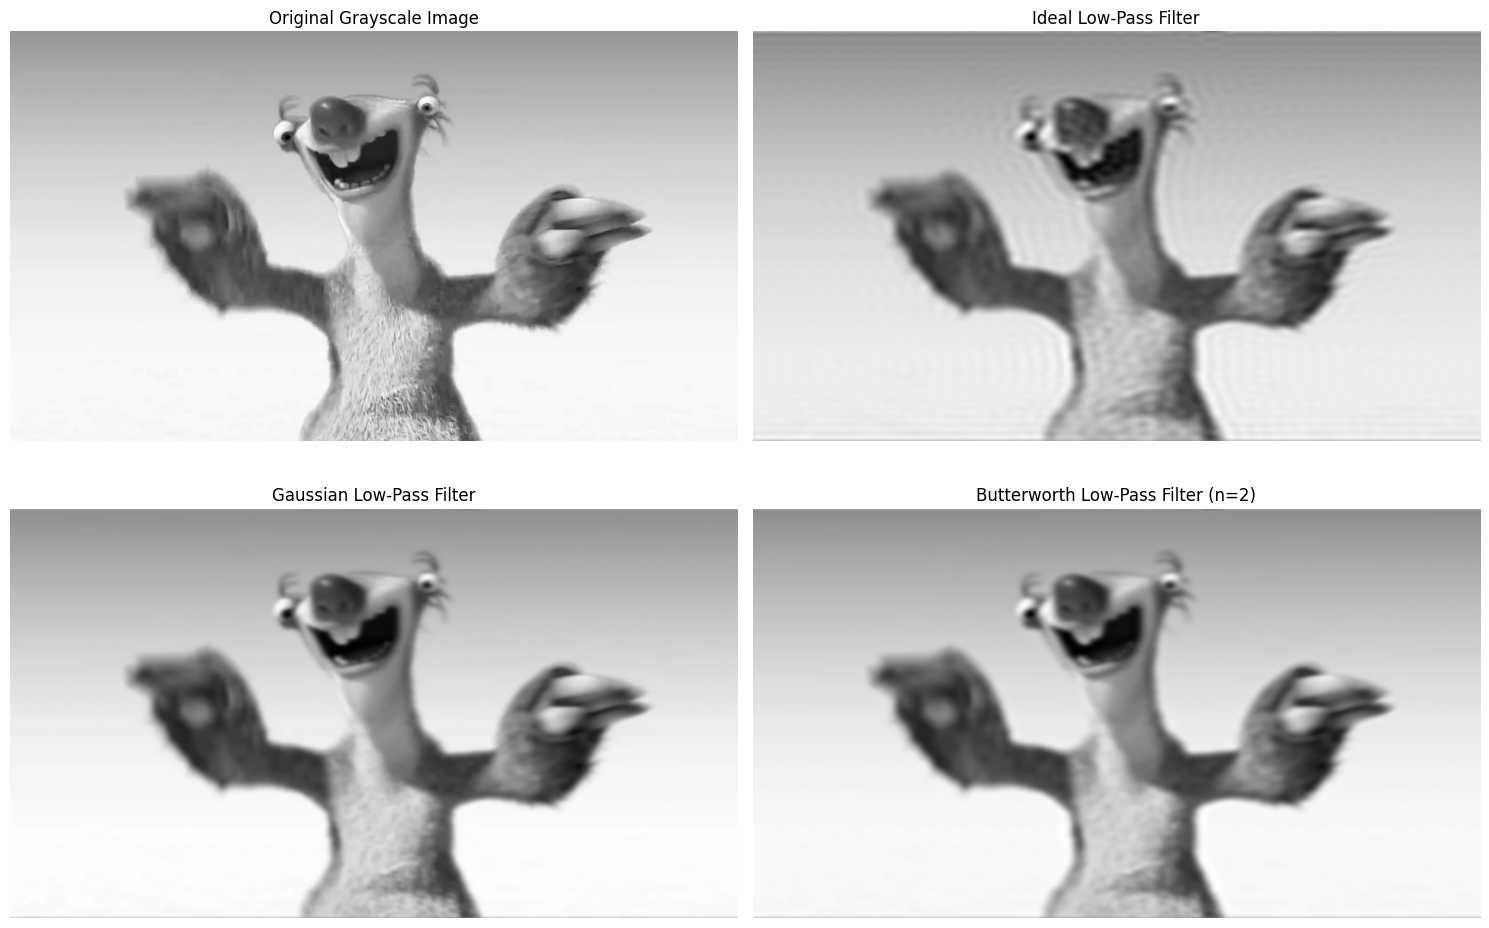

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming gray_img is already loaded from a previous cell
# 10. Implementing various low pass or smoothening frequency domain filters

def create_low_pass_filter_mask(shape, D0, filter_type='ideal', n=2):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if filter_type == 'ideal':
                mask[i, j] = 1 if D <= D0 else 0
            elif filter_type == 'gaussian':
                mask[i, j] = np.exp(-(D**2) / (2 * D0**2))
            elif filter_type == 'butterworth':
                mask[i, j] = 1 / (1 + (D / D0)**(2 * n))
            else:
                raise ValueError("Invalid filter type")
    return mask

def apply_frequency_filter(image, filter_mask):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Apply the filter mask
    filtered_dft_shift = dft_shift * filter_mask[:, :, np.newaxis]

    # Inverse shift
    f_ishift = np.fft.ifftshift(filtered_dft_shift)

    # Inverse DFT
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Use the grayscale image (gray_img)
rows, cols = gray_img.shape

# Create filter masks for different low-pass filters
D0 = 50 # Cutoff frequency

ideal_lp_mask = create_low_pass_filter_mask((rows, cols), D0, filter_type='ideal')
gaussian_lp_mask = create_low_pass_filter_mask((rows, cols), D0, filter_type='gaussian')
butterworth_lp_mask = create_low_pass_filter_mask((rows, cols), D0, filter_type='butterworth', n=2)

# Apply the filters
img_ideal_lp = apply_frequency_filter(gray_img, ideal_lp_mask)
img_gaussian_lp = apply_frequency_filter(gray_img, gaussian_lp_mask)
img_butterworth_lp = apply_frequency_filter(gray_img, butterworth_lp_mask)


plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_ideal_lp, cmap='gray')
plt.title('Ideal Low-Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_gaussian_lp, cmap='gray')
plt.title('Gaussian Low-Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_butterworth_lp, cmap='gray')
plt.title('Butterworth Low-Pass Filter (n=2)')
plt.axis('off')

plt.tight_layout()
plt.show()

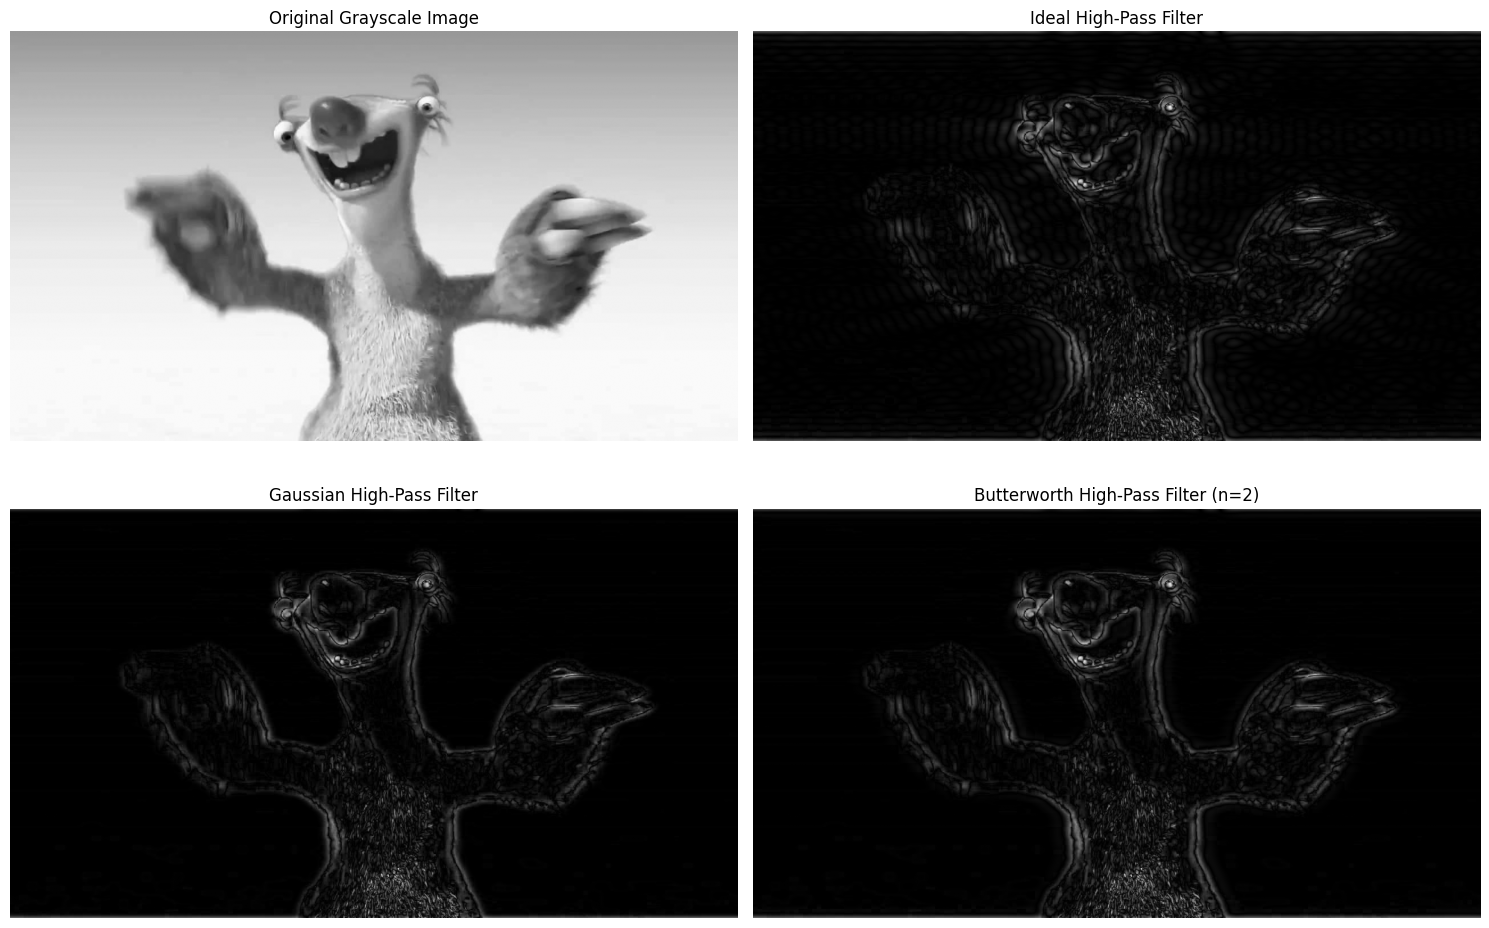

In [23]:
def create_high_pass_filter_mask(shape, D0, filter_type='ideal', n=2):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if filter_type == 'ideal':
                mask[i, j] = 0 if D <= D0 else 1
            elif filter_type == 'gaussian':
                mask[i, j] = 1 - np.exp(-(D**2) / (2 * D0**2))
            elif filter_type == 'butterworth':
                mask[i, j] = 1 / (1 + (D0 / D)**(2 * n)) if D != 0 else 0
            else:
                raise ValueError("Invalid filter type")
    return mask

# Use the grayscale image (gray_img)
rows, cols = gray_img.shape

# Create filter masks for different high-pass filters
D0 = 30 # Cutoff frequency

ideal_hp_mask = create_high_pass_filter_mask((rows, cols), D0, filter_type='ideal')
gaussian_hp_mask = create_high_pass_filter_mask((rows, cols), D0, filter_type='gaussian')
butterworth_hp_mask = create_high_pass_filter_mask((rows, cols), D0, filter_type='butterworth', n=2)

# Apply the filters
img_ideal_hp = apply_frequency_filter(gray_img, ideal_hp_mask)
img_gaussian_hp = apply_frequency_filter(gray_img, gaussian_hp_mask)
img_butterworth_hp = apply_frequency_filter(gray_img, butterworth_hp_mask)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_ideal_hp, cmap='gray')
plt.title('Ideal High-Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_gaussian_hp, cmap='gray')
plt.title('Gaussian High-Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_butterworth_hp, cmap='gray')
plt.title('Butterworth High-Pass Filter (n=2)')
plt.axis('off')

plt.tight_layout()
plt.show()

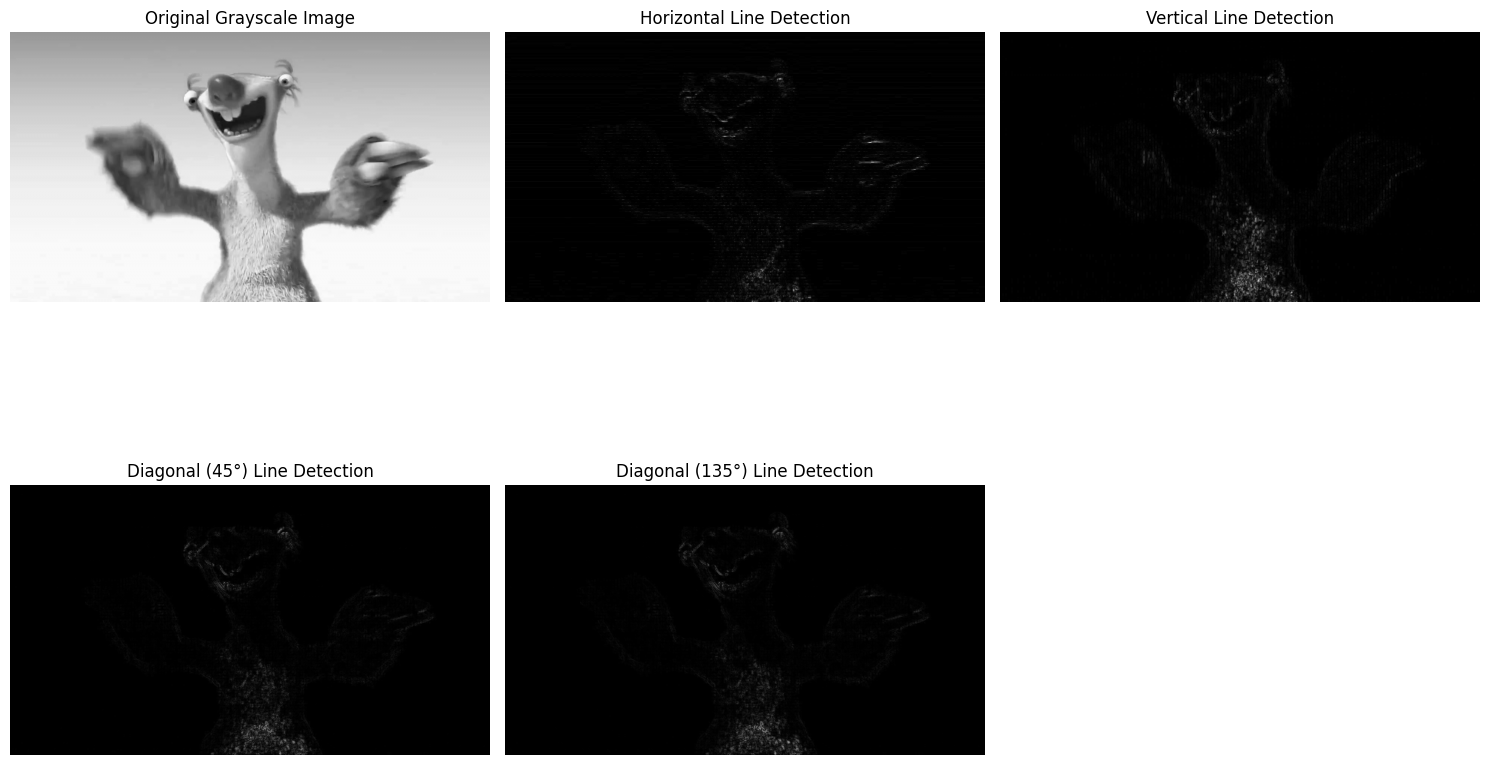

In [24]:
def apply_line_detection_filter(image, kernel):
    # Apply the filter
    filtered_image = cv2.filter2D(image, cv2.CV_64F, kernel)
    # Convert to absolute values and scale to 0-255
    return cv2.convertScaleAbs(filtered_image)

# Use the grayscale image (gray_img)
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Define line detection kernels
horizontal_kernel = np.array([[-1, -1, -1],
                              [ 2,  2,  2],
                              [-1, -1, -1]], dtype=np.float32)

vertical_kernel = np.array([[-1, 2, -1],
                            [-1, 2, -1],
                            [-1, 2, -1]], dtype=np.float32)

diagonal_45_kernel = np.array([[-1, -1, 2],
                               [-1, 2, -1],
                               [ 2, -1, -1]], dtype=np.float32)

diagonal_135_kernel = np.array([[ 2, -1, -1],
                               [-1, 2, -1],
                               [-1, -1, 2]], dtype=np.float32)

# Apply the filters
img_horizontal_lines = apply_line_detection_filter(img_gray, horizontal_kernel)
img_vertical_lines = apply_line_detection_filter(img_gray, vertical_kernel)
img_diagonal_45_lines = apply_line_detection_filter(img_gray, diagonal_45_kernel)
img_diagonal_135_lines = apply_line_detection_filter(img_gray, diagonal_135_kernel)


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_horizontal_lines, cmap='gray')
plt.title('Horizontal Line Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_vertical_lines, cmap='gray')
plt.title('Vertical Line Detection')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_diagonal_45_lines, cmap='gray')
plt.title('Diagonal (45°) Line Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_diagonal_135_lines, cmap='gray')
plt.title('Diagonal (135°) Line Detection')
plt.axis('off')


plt.tight_layout()
plt.show()